## H$_n$ data

In [1]:
import numpy as np
import json
from os import walk

In [39]:
data = {"H2":{"data":[]}, 
        "H3":{"data":[]}, 
        "H4":{"data":[]}, 
        "H5":{"data":[]}
        }

kinds = list(data.keys())
#read all data:
#f_dir = "C:/Users/beryl/Documents/WU/Main Topic/PythonFilesImportant/Data/Files/" # main pc dir
f_dir = "/users/baribowo/Documents/maintopic/PythonFilesImportant/Data/Files/" # office dir
_, _, onlyfiles = next(walk(f_dir))
print(onlyfiles)
for f in onlyfiles:
    f = open(f_dir+f)
    f_data = json.load(f)
    #data["H2"]["data"]
    print(f_data.keys(), len(f_data["data"]), f_data["kind"])
    data[f_data["kind"]]["data"].append(f_data["data"]) #aggregate data (probably a bad idea) using .extend, .append results in different set
    

['H3_Su_class_1.txt', 'H4_Hinde_QZ.txt', 'H3_mielke_main.txt', 'H5_Tablero.txt', 'H3_Su_class_2.txt', 'H2_Kolos.txt', 'H4_Hinde_TZ.txt', 'artificial_H2_Kolos.txt', 'H2_Wolniewicz_BO.txt', 'H3_mielke_vdw.txt', 'H3_mielke_ac.txt', 'H3_mielke_coll.txt']
dict_keys(['data', 'accuracy', 'kind', 'name', 'info']) 1409 H3
dict_keys(['kind', 'name', 'data', 'H21_data', 'H22_data', 'accuracy', 'info']) 1653 H4
dict_keys(['data', 'accuracy', 'kind', 'name', 'info']) 3263 H3
dict_keys(['info', 'accuracy', 'name', 'kind', 'data']) 2799 H5
dict_keys(['data', 'accuracy', 'kind', 'name', 'info']) 991 H3
dict_keys(['info', 'accuracy', 'name', 'kind', 'data']) 87 H2
dict_keys(['data', 'kind', 'name', 'accuracy', 'info']) 855 H4
dict_keys(['info', 'accuracy', 'name', 'kind', 'data']) 2000 H2
dict_keys(['info', 'accuracy', 'name', 'kind', 'data']) 670 H2
dict_keys(['data', 'accuracy', 'kind', 'name', 'info']) 220 H3
dict_keys(['data', 'accuracy', 'kind', 'name', 'info']) 140 H3
dict_keys(['data', 'accuracy

2000

In [179]:
# plot to check H2 data 
import matplotlib.pyplot as plt
model_num = 0
print("total data:", len(data["H5"]["data"][model_num]))
#r, energy = np.array(data["H2"]["data"][model_num]).T #only for H2
Ab = np.array(data["H5"]["data"][model_num])
r = Ab[:,0:Ab.shape[1]-1]
energy = Ab[:,Ab.shape[1]-1:Ab.shape[1]].reshape(-1)
'''
plt.rcParams["figure.figsize"] = (20,15)
fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.suptitle('H data')
ax1.plot(r, energy)

from scipy.stats import norm
ax2.plot(r, norm.pdf(r),'r-', lw=5, alpha=0.6, label='norm pdf r')
ax3.plot(energy, norm.pdf(energy),'r+', lw=5, alpha=0.6, label='norm pdf energy')
'''

total data: 2799


'\nplt.rcParams["figure.figsize"] = (20,15)\nfig, (ax1, ax2, ax3) = plt.subplots(3)\nfig.suptitle(\'H data\')\nax1.plot(r, energy)\n\nfrom scipy.stats import norm\nax2.plot(r, norm.pdf(r),\'r-\', lw=5, alpha=0.6, label=\'norm pdf r\')\nax3.plot(energy, norm.pdf(energy),\'r+\', lw=5, alpha=0.6, label=\'norm pdf energy\')\n'

In [180]:
'''Raise the dimension of the data'''
A = np.zeros((r.shape[0],10)) # data matrix with increased dimension, to accomodate higher H clusters (up to H5)
#A[:,0] = r # H2 exclusive
A[:,:r.shape[1]] = r # Hx
print(A)

[[ 6.      6.      6.     ...  1.4    12.     11.918 ]
 [ 5.      6.4     5.     ... 11.4    12.8     1.4   ]
 [ 1.4012  6.4012 11.4012 ...  5.      6.4012  1.4012]
 ...
 [ 8.      8.      8.     ...  8.      8.     13.0639]
 [ 8.      8.      8.     ... 11.3137 16.     11.3137]
 [10.     10.      9.0738 ...  9.0738  9.0738 14.0001]]


In [181]:
'''
Split the training and test data
'''
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(A, energy, test_size=0.25, random_state=13)
print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (2099, 10)
Training Labels Shape: (2099,)
Testing Features Shape: (700, 10)
Testing Labels Shape: (700,)


In [182]:
'''
Setup the Random Forest parameters
'''
from sklearn.ensemble import RandomForestRegressor

#generate the RF model
rf = RandomForestRegressor(n_estimators= 1000, random_state=13, verbose=1)

#train the model on training data
rf.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   12.0s finished


RandomForestRegressor(n_estimators=1000, random_state=13, verbose=1)

In [183]:
'''Model evaluation on training set'''
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

preds = rf.predict(x_train)

#Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_train, preds))
print('Root Mean Squared Error :', round(rmse, 2))

#Pearson Correlation Coefficient (PCC) score
pcc = pearsonr(y_train, preds)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Root Mean Squared Error : 0.01


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.3s finished


In [184]:
'''Model evaluation on Test set'''
preds = rf.predict(x_test)

#Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, preds))
print('Root Mean Squared Error :', round(rmse, 2))

#Pearson Correlation Coefficient (PCC) score
pcc = pearsonr(y_test, preds)
print('Pearson Correlation Coefficient :', round(pcc[0],2))

Root Mean Squared Error : 0.03
Pearson Correlation Coefficient : 0.92


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished


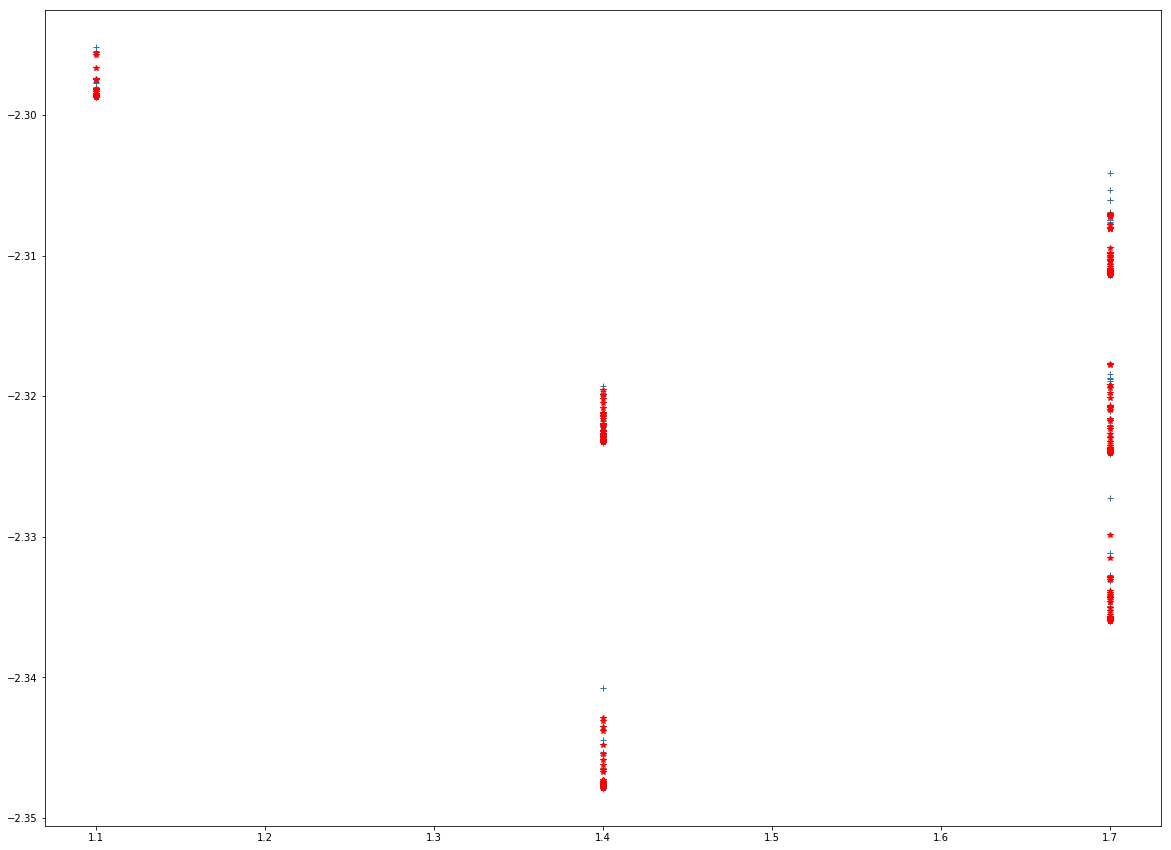

In [170]:
'''actual vs prediction'''
plt.plot(x_test[:,0], y_test, "+", label="actual")
plt.plot(x_test[:,0], preds, "r*", label="predicted")

### Testing with sparse matrix feature for up to 5th H cluster

In [215]:
'''Assemble the data based on model number (default is 0)'''
model_num = 0
lengths = np.array([len(data[kind]["data"][model_num]) for kind in kinds])
sum_length = np.sum(lengths)
A = np.zeros((sum_length, 10)) #feature (A) sparse matrix
b = np.zeros((sum_length)) #target (b)
iterat = 0
for i in range(len(kinds)):
    temp_data = np.array(data[kinds[i]]["data"][model_num])
    feature = temp_data[:, :len(temp_data[0])-1]
    label = temp_data[:,-1]
    A[iterat:iterat+lengths[i], :feature.shape[1]] = feature
    b[iterat:iterat+lengths[i]] = label
    iterat += lengths[i]

[0. 0. 0. ... 0. 0. 0.]
[[0.4, 0.8797972000000001], [0.45, 0.6490718], [0.5, 0.47337300000000004], [0.55, 0.33722929999999995], [0.6, 0.2303659], [0.65, 0.14563859999999995], [0.7, 0.07797390000000004], [0.75, 0.02366429999999997], [0.8, -0.020055600000000062], [0.9, -0.08364220000000011], [1.0, -0.12453850000000011], [1.1, -0.15005620000000008], [1.2, -0.16493420000000003], [1.3, -0.17234590000000005], [1.35, -0.17396269999999991], [1.39, -0.1744517000000001], [1.4, -0.17447440000000003], [1.401, -0.17447459999999992], [1.4011, -0.17447459999999992], [1.41, -0.1744599], [1.45, -0.1740558000000001], [1.5, -0.1728537000000001], [1.6, -0.1685798999999999], [1.7, -0.16245700000000007], [1.8, -0.15506700000000007], [1.9, -0.1468495999999999], [2.0, -0.1381311999999999], [2.1, -0.12915619999999994], [2.2, -0.12012329999999993], [2.3, -0.1111724999999999], [2.4, -0.10241269999999991], [2.5, -0.09392730000000005], [2.6, -0.08578100000000011], [2.7, -0.0780164000000001], [2.8, -0.0706700000000

In [217]:
'''
Split the training and test data
'''
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(A, b, test_size=0.25, random_state=13)
print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (4461, 10)
Training Labels Shape: (4461,)
Testing Features Shape: (1487, 10)
Testing Labels Shape: (1487,)


In [218]:
'''
Setup the Random Forest parameters
'''
from sklearn.ensemble import RandomForestRegressor

#generate the RF model
rf = RandomForestRegressor(n_estimators= 1000, random_state=13, verbose=1)

#train the model on training data
rf.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   17.9s finished


RandomForestRegressor(n_estimators=1000, random_state=13, verbose=1)

In [219]:
'''Model evaluation on training set'''
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

preds = rf.predict(x_train)

#Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_train, preds))
print('Root Mean Squared Error :', round(rmse, 2))

#Pearson Correlation Coefficient (PCC) score
pcc = pearsonr(y_train, preds)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.6s finished


Root Mean Squared Error : 0.01


In [220]:
'''Model evaluation on Test set'''
preds = rf.predict(x_test)

#Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, preds))
print('Root Mean Squared Error :', round(rmse, 2))

#Pearson Correlation Coefficient (PCC) score
pcc = pearsonr(y_test, preds)
print('Pearson Correlation Coefficient :', round(pcc[0],2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Root Mean Squared Error : 0.02
Pearson Correlation Coefficient : 1.0


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.3s finished


## H$_2$, OH, O$_2$ data

### Data cleaning

In [206]:
f_dir = "/users/baribowo/Code/Python/pes/data/" # office dir
_, _, onlyfiles = next(walk(f_dir))
print(onlyfiles)

        
list_data = []

#clean OH data:
R_values = []
V_values = []
fname = 'OH_multi_states_eV'
with open(f_dir+fname) as f:
    lines = [line.rstrip() for line in f]
    for i in range(len(lines)):
        if lines[i][0] == '$':
            if i==0:
                data = {'mol':'OH'}
                splitline = lines[i].split()
                data['state'] = splitline[0]
                data['author'] = splitline[1]
            else:
                data["R"] = np.array(R_values)
                data["V"] = np.array(V_values)
                R_values = []
                V_values = []
                list_data.append(data)
                data = {'mol':'OH'}
                splitline = lines[i].split()
                data['state'] = splitline[0]
                data['author'] = splitline[1]
        else:
            splitline = lines[i].split()
            if splitline[1][0]=="−":
                splitline[1] = splitline[1].replace("−","-")
            R_values.append(float(splitline[0]))
            V_values.append(float(splitline[1]))
            if i==len(lines)-1:
                data["R"] = np.array(R_values)
                data["V"] = np.array(V_values)
                R_values = []
                V_values = []
                list_data.append(data)
        '''
        elif (i==len(lines)-1):
            data["R"] = np.array(R_values)
            data["V"] = np.array(V_values)
            R_values = []
            V_values = []
            list_data.append(data)
        '''
        

array = []
fname = 'OH_Chu_et_al_1974_hartree'
states = ["$X^2\Pi$ MCSCF", "$X^2\Pi$ CI", "$A^2\Sigma^+$ MCSCF", "$A^2\Sigma^+$ CI"]
with open(f_dir+fname) as f:
    lines = [line.rstrip() for line in f]
    for i in range(1, len(lines)):
        splitlines = lines[i].split()
        arr = np.array(splitlines, dtype = 'float')
        array.append(arr)
array = np.array(array)
array = array.T
for i in range(len(states)):
    data = {'mol':'OH','author':'Chu et al 1974'}; data["state"] = states[i]; data["R"] = array[0]; data["V"] = array[i+1]
    list_data.append(data)
            
#clean O2 data:
array = []
states = None
fname = 'O2_data_Bytautas2010_milihartree'
with open(f_dir+fname) as f:
    lines = [line.rstrip() for line in f]
    states = lines[0].split()
    for i in range(1, len(lines)):
        splitlines = lines[i].split()
        arr = np.array(splitlines, dtype = 'float')
        array.append(arr)
array = np.array(array)
array = array.T
for i in range(1, len(states)):
    data = {'mol':'O2','author':'Bytautas2010'}; data["state"] = states[i]; data["R"] = array[0]; data["V"] = array[i]
    list_data.append(data)

#H2 data:
fnames = ['H2_Kolos.txt', 'H2_Wolniewicz_BO.txt']
for fname in fnames:
    f = open(f_dir+fname)
    f_data = json.load(f)
    #data["H2"]["data"]
    print(f_data.keys(), len(f_data["data"]), f_data["kind"])
    arr = np.array(f_data["data"]).T
    data = {'mol':'H2','author':fname.split('.')[0], 'state':'ground', 'R':arr[0], 'V':arr[1]}
    list_data.append(data)

for data in list_data:
    print(data)

['OH_Chu_et_al_1974_hartree', 'OH_multi_states_eV', 'H2_Kolos.txt', 'O2_data_Bytautas2010_milihartree', 'artificial_H2_Kolos.txt', 'H2_Wolniewicz_BO.txt']
dict_keys(['info', 'accuracy', 'name', 'kind', 'data']) 87 H2
dict_keys(['info', 'accuracy', 'name', 'kind', 'data']) 670 H2
{'mol': 'OH', 'state': '$X^2\\Pi$', 'author': 'Pradhan1995', 'R': array([1.  , 1.1 , 1.2 , 1.25, 1.3 , 1.5 , 1.6 , 1.75, 1.9 , 2.  , 2.1 ,
       2.25, 2.4 , 2.5 , 2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.5 , 4.75,
       5.  , 5.25, 5.5 , 6.  , 7.  , 7.1 , 7.2 ]), 'V': array([ 1.16670e+01,  6.13800e+00,  2.29300e+00,  8.47230e-01,
       -4.71180e-01, -3.37316e+00, -4.05089e+00, -4.50268e+00,
       -4.53042e+00, -4.40562e+00, -4.20861e+00, -3.83143e+00,
       -3.40631e+00, -3.11515e+00, -2.40954e+00, -1.78479e+00,
       -1.26939e+00, -8.70850e-01, -5.80780e-01, -3.80620e-01,
       -1.61350e-01, -1.05660e-01, -6.97000e-02, -4.63200e-02,
       -3.09900e-02, -1.40500e-02, -2.71000e-03, -1.96000e-03,
       -1.7

data lengths: [29, 32, 24]
data lengths: [21, 14, 24]
data lengths: [23, 23, 23]
data lengths: [20, 20, 20]
data lengths: [22, 22, 22, 22]


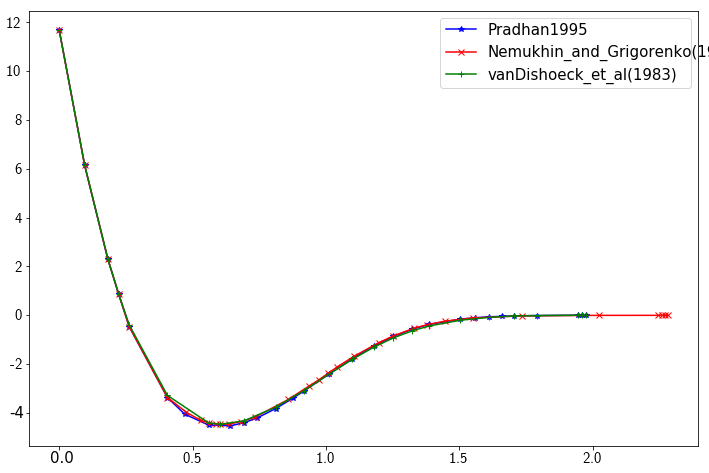

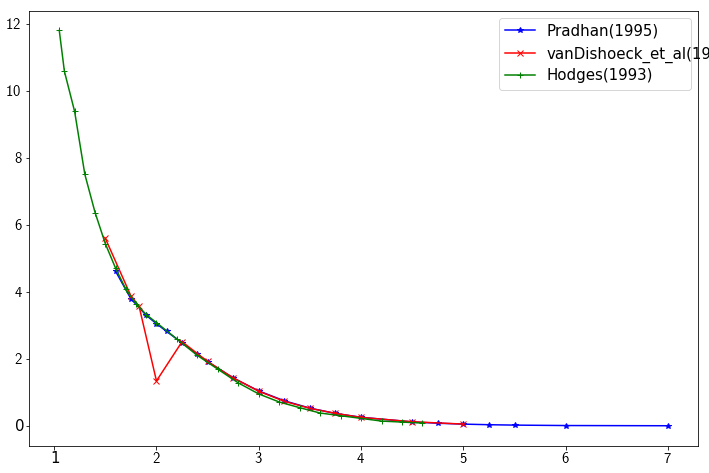

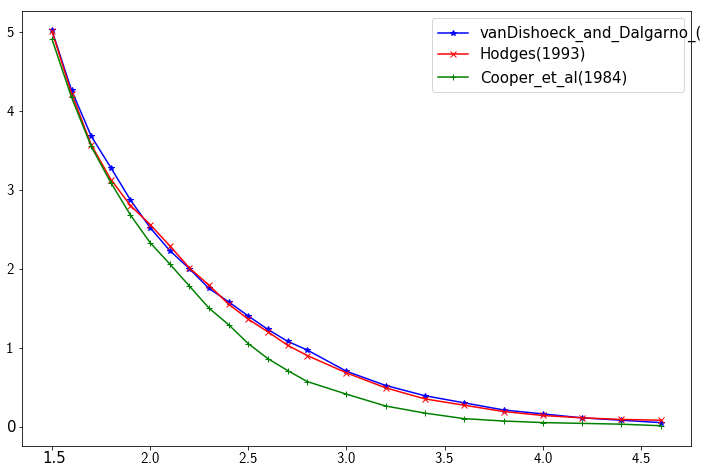

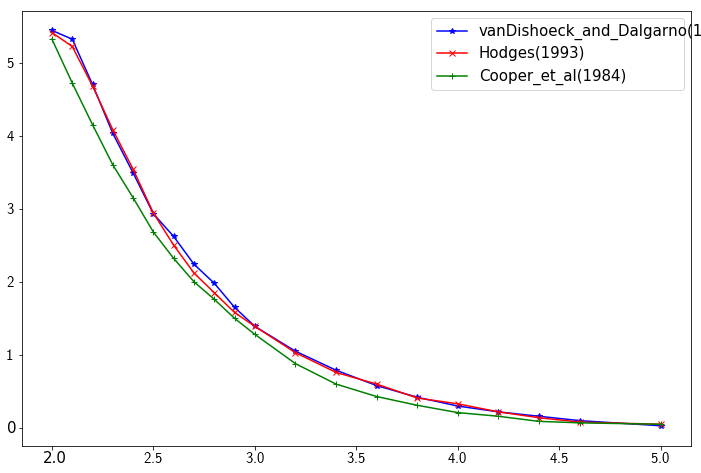

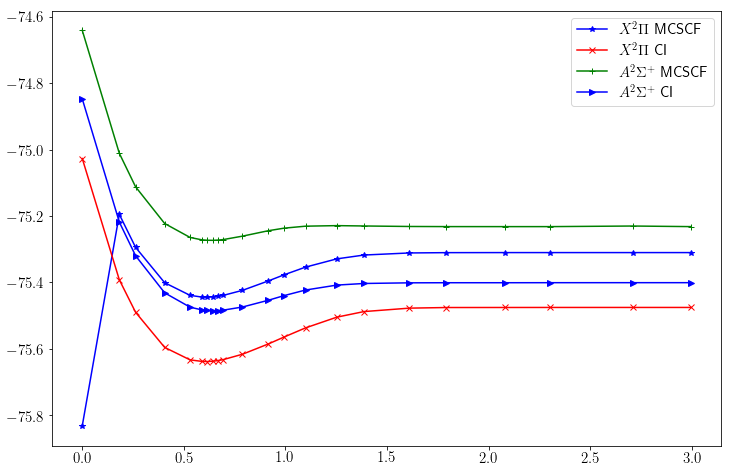

In [207]:
shapes = ['b-*','r-x','g-+', 'b->', 'r-D', 'b-<', 'g-X']
#  OH :
# All from Shizgal98:
#OH X^2\Pi:
import matplotlib
matplotlib.rcParams['text.usetex'] = False
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.log(list_data[0]['R']), list_data[0]['V'], 'b-*')
ax.plot(np.log(list_data[1]['R']), list_data[1]['V'], 'r-x')
ax.plot(np.log(list_data[2]['R']), list_data[2]['V'], 'g-+')
auths = []
for i in range(3):
    auths.append(list_data[i]['author'])
ax.legend(auths)
print("data lengths:",[len(list_data[i]['R']) for i in range(3)])

#OH ^2\Sigma^-:
#the correct way to fetch:
import matplotlib
matplotlib.rcParams['text.usetex'] = False
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))
idxes = []
auths = []
for i in range(len(list_data)):
    if (list_data[i]['state'] == '$^2\\Sigma^-$') and (list_data[i]['mol'] == 'OH'):
        idxes.append(i)
        auths.append(list_data[i]['author'])
for i, idx in enumerate(idxes):
    ax.plot(list_data[idx]['R'], list_data[idx]['V'], shapes[i])
ax.legend(auths)
print("data lengths:",[len(list_data[i]['R']) for i in idxes])


#OH ^4\Sigma^-:
import matplotlib
matplotlib.rcParams['text.usetex'] = False
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))
idxes = []
auths = []
for i in range(len(list_data)):
    if (list_data[i]['state'] == '$^4\\Sigma^-$') and (list_data[i]['mol'] == 'OH'):
        idxes.append(i)
        auths.append(list_data[i]['author'])
for i, idx in enumerate(idxes):
    ax.plot(list_data[idx]['R'], list_data[idx]['V'], shapes[i])
ax.legend(auths)
print("data lengths:",[len(list_data[i]['R']) for i in idxes])


#OH ^4\\Pi:
import matplotlib
matplotlib.rcParams['text.usetex'] = False
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))
idxes = []
auths = []
for i in range(len(list_data)):
    if (list_data[i]['state'] == '$^4\\Pi$') and (list_data[i]['mol'] == 'OH'):
        idxes.append(i)
        auths.append(list_data[i]['author'])
for i, idx in enumerate(idxes):
    ax.plot(list_data[idx]['R'], list_data[idx]['V'], shapes[i])
ax.legend(auths)
print("data lengths:",[len(list_data[i]['R']) for i in idxes])

# All from Chu et al 1974:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))
idxes = []
states = []
for i in range(len(list_data)):
    if (list_data[i]['author'] == 'Chu et al 1974') and (list_data[i]['mol'] == 'OH'):
        idxes.append(i)
        states.append(list_data[i]['state'])
for i, idx in enumerate(idxes):
    ax.plot(np.log(list_data[idx]['R']), list_data[idx]['V'], shapes[i])
ax.legend(states)
print("data lengths:",[len(list_data[i]['R']) for i in idxes])

data lengths: [26, 26, 26]


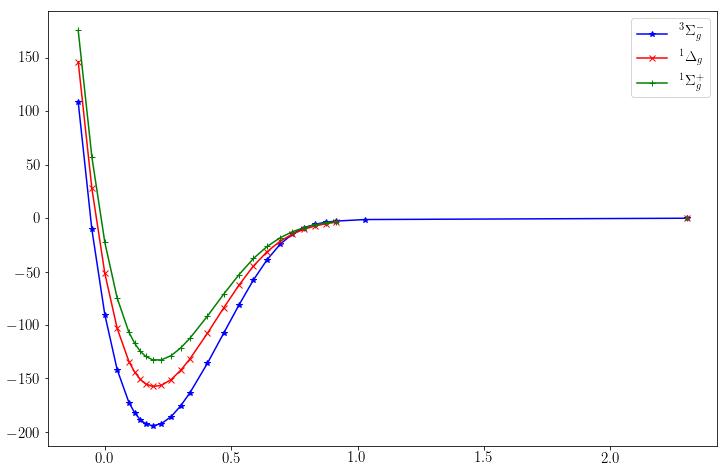

In [210]:
# O2:
# from Bytautas2010:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams.update({'font.size': 15})
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))
idxes = []
states = []
for i in range(len(list_data)):
    if (list_data[i]['mol'] == 'O2'):
        idxes.append(i)
        states.append(list_data[i]['state'])
for i, idx in enumerate(idxes):
    ax.plot(np.log(list_data[idx]['R']), list_data[idx]['V'], shapes[i])
ax.legend(states)
print("data lengths:",[len(list_data[i]['R']) for i in idxes])

data lengths: [87, 670]


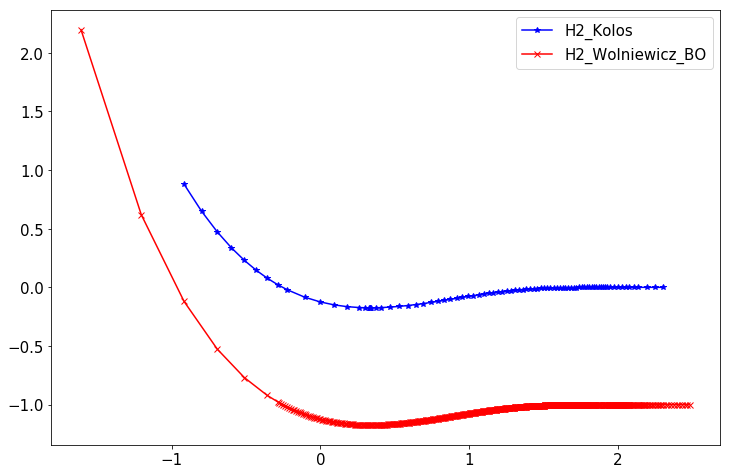

In [211]:
# H2
# Kolos and Wolniewicz
import matplotlib
matplotlib.rcParams['text.usetex'] = False
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))
idxes = []
auths = []
for i in range(len(list_data)):
    if (list_data[i]['mol'] == 'H2'):
        idxes.append(i)
        auths.append(list_data[i]['author'])
for i, idx in enumerate(idxes):
    ax.plot(np.log(list_data[idx]['R']), list_data[idx]['V'], shapes[i])
ax.legend(auths)
print("data lengths:",[len(list_data[i]['R']) for i in idxes])

In [214]:
state_set = []
for dat in list_data:
    state_set.append(dat["state"])
state_set = set(state_set)

{'$X^2\\Pi$', '$A^2\\Sigma^+$ CI', '$X^2\\Pi$ MCSCF', '$^4\\Sigma^-$', '$X^2\\Pi$ CI', '$^2\\Sigma^-$', 'ground', '$^4\\Pi$', '$A^2\\Sigma^+$ MCSCF', '$^1\\Delta_g$', '$^1\\Sigma_g^+$', '$^3\\Sigma_g^-$'}


[ 5.  6.  8. 10. 15. 20.] [-75.47753  -75.475676 -75.475545 -75.475452 -75.47543  -75.475432]


Text(0.5,1,'1/R**4')

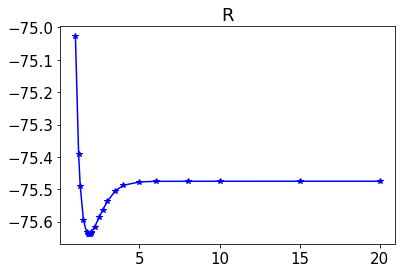

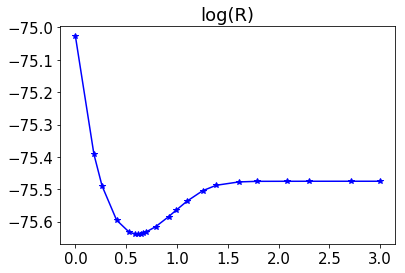

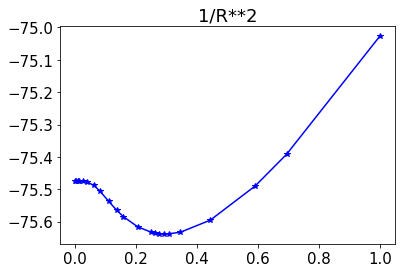

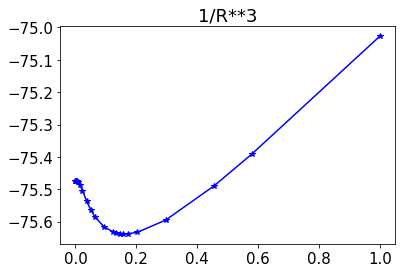

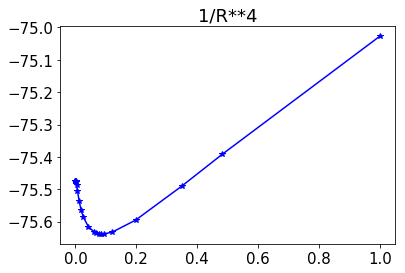

In [292]:
# test shift data of Chu et al
data_shift = []
for dat in list_data:
    if dat['author'] == 'Chu et al 1974':
        data_shift.append(dat)


import matplotlib.pyplot as plt
idx = 1
#fig, ax = plt.subplots(figsize=(10, 5))
#ax.plot(data_shift[idx]['R'], data_shift[idx]['V'])
# test shift on one data:
size = len(data_shift[idx]['R'])
R = data_shift[idx]['R'][size-6:size]
V = data_shift[idx]['V'][size-6:size]
print(R, V)
plt.plot(data_shift[idx]['R'], data_shift[idx]['V'], 'b-*')
plt.title("R")
plt.figure()
plt.plot(np.log(data_shift[idx]['R']), data_shift[idx]['V'], 'b-*')
plt.title("log(R)")
plt.figure()
plt.plot(1/data_shift[idx]['R']**2, data_shift[idx]['V'], 'b-*')
plt.title("1/R**2")
plt.figure()
plt.plot(1/data_shift[idx]['R']**3, data_shift[idx]['V'], 'b-*')
plt.title("1/R**3")
plt.figure()
plt.plot(1/data_shift[idx]['R']**4, data_shift[idx]['V'], 'b-*')
plt.title("1/R**4")

# answer: shift the energy by the last value of the point, since the energy value is already linear

data lengths: [22, 22, 22, 22]


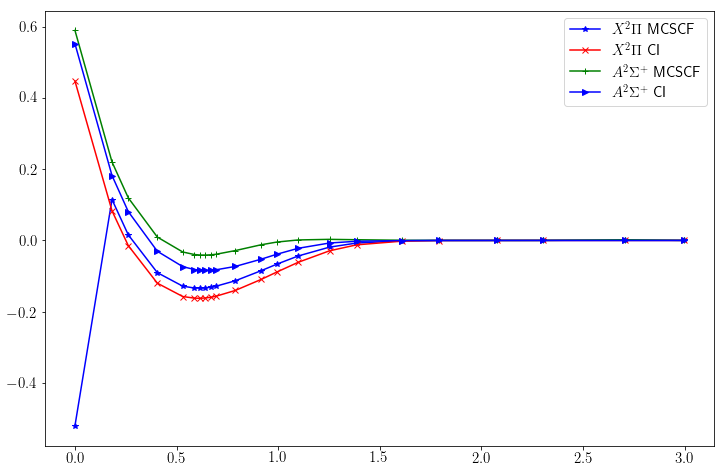

In [295]:
# shift data by criterion
# chu et al: all data shifted by the last index's energy
for dat in list_data:
    if dat['author'] == 'Chu et al 1974':
        dat['V'] -= dat['V'][-1]

# test plot:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))
idxes = []
states = []
for i in range(len(list_data)):
    if (list_data[i]['author'] == 'Chu et al 1974') and (list_data[i]['mol'] == 'OH'):
        idxes.append(i)
        states.append(list_data[i]['state'])
for i, idx in enumerate(idxes):
    ax.plot(np.log(list_data[idx]['R']), list_data[idx]['V'], shapes[i])
ax.legend(states)
print("data lengths:",[len(list_data[i]['R']) for i in idxes])

In [305]:
#save data
np.save('data/hxoy_data', list_data, allow_pickle=True)
test_data = np.load('data/hxoy_data.npy', allow_pickle=True)
test_data[()][1]

{'mol': 'OH',
 'state': '$X^2\\Pi$',
 'author': 'Nemukhin_and_Grigorenko(1997)',
 'R': array([1.  , 1.1 , 1.2 , 1.25, 1.3 , 1.5 , 1.61, 1.7 , 1.75, 1.8 , 1.83,
        1.89, 1.98, 2.08, 2.36, 2.55, 2.65, 2.74, 2.83, 3.02, 3.31, 3.5 ,
        3.78, 3.97, 4.25, 4.72, 5.67, 7.56, 9.45, 9.6 , 9.7 , 9.8 ]),
 'V': array([ 1.16670e+01,  6.13800e+00,  2.29300e+00,  8.47230e-01,
        -4.71180e-01, -3.37316e+00, -3.97575e+00, -4.31208e+00,
        -4.40487e+00, -4.46228e+00, -4.47616e+00, -4.46038e+00,
        -4.35807e+00, -4.18637e+00, -3.45358e+00, -2.90719e+00,
        -2.63889e+00, -2.38012e+00, -2.13305e+00, -1.68298e+00,
        -1.13142e+00, -8.47610e-01, -5.35510e-01, -3.90470e-01,
        -2.42720e-01, -1.12380e-01, -2.96600e-02, -8.16000e-03,
        -6.53000e-03, -3.21000e-03, -3.01000e-03, -2.83000e-03])}